In [ ]:
import numpy as np
import pandas as pd 
import os

In [2]:
import shutil
import os
folders_to_delete = ["/kaggle/working/UECFOOD256_renamed", "/kaggle/working/dataset"]

for folder in folders_to_delete:
    if os.path.exists(folder):
        shutil.rmtree(folder)
        print(f"✅ Đã xóa thư mục: {folder}")
    else:
        print(f"⚠ Thư mục không tồn tại: {folder}")

⚠ Thư mục không tồn tại: /kaggle/working/UECFOOD256_renamed
⚠ Thư mục không tồn tại: /kaggle/working/dataset


In [ ]:
import os

folders = [
    "/kaggle/working/dataset/images/train",
    "/kaggle/working/dataset/images/valid",
    "/kaggle/working/dataset/images/test",
    "/kaggle/working/dataset/labels/train",
    "/kaggle/working/dataset/labels/valid",
    "/kaggle/working/dataset/labels/test"
]

for folder in folders:
    os.makedirs(folder, exist_ok=True)  

print("✅ Đã tạo thư mục thành công!")

✅ Đã tạo thư mục thành công!


In [4]:
from collections import Counter
dataset_path = "/kaggle/input/dataset265/UECFOOD256"
food_folders = [str(i) for i in range(1, 257)]  # 1 đến 256

# Tạo danh sách chứa tất cả tên ảnh
all_filenames = []

for folder in food_folders:
    folder_path = os.path.join(dataset_path, folder)
    if os.path.exists(folder_path):
        images = [img for img in os.listdir(folder_path) if img.endswith(".jpg")]
        all_filenames.extend(images)

# Đếm số lần xuất hiện của từng tên ảnh
duplicate_check = Counter(all_filenames)

# Lọc ra ảnh bị trùng tên
duplicates = {name: count for name, count in duplicate_check.items() if count > 1}
print(duplicates)

{'13333.jpg': 3, '11956.jpg': 4, '14619.jpg': 3, '89.jpg': 3, '14510.jpg': 2, '5158.jpg': 3, '58.jpg': 2, '14919.jpg': 2, '16675.jpg': 4, '11774.jpg': 2, '15370.jpg': 3, '14104.jpg': 2, '13723.jpg': 4, '7293.jpg': 4, '13325.jpg': 2, '4305.jpg': 2, '11649.jpg': 3, '14237.jpg': 2, '4955.jpg': 4, '13999.jpg': 3, '14642.jpg': 2, '13893.jpg': 3, '15895.jpg': 4, '13752.jpg': 2, '13297.jpg': 2, '16034.jpg': 2, '13695.jpg': 4, '14723.jpg': 3, '14903.jpg': 3, '16691.jpg': 3, '15246.jpg': 4, '14615.jpg': 2, '15414.jpg': 3, '13733.jpg': 4, '15741.jpg': 2, '13867.jpg': 3, '13693.jpg': 2, '14346.jpg': 2, '13182.jpg': 4, '16643.jpg': 2, '14425.jpg': 2, '4300.jpg': 3, '14364.jpg': 4, '15506.jpg': 4, '11576.jpg': 3, '16191.jpg': 3, '14206.jpg': 2, '12184.jpg': 2, '4004.jpg': 4, '15792.jpg': 3, '16050.jpg': 2, '15311.jpg': 5, '15806.jpg': 2, '4958.jpg': 3, '14505.jpg': 3, '13704.jpg': 4, '14616.jpg': 3, '14909.jpg': 4, '5101.jpg': 3, '16036.jpg': 2, '11184.jpg': 4, '30.jpg': 2, '97.jpg': 4, '12923.jpg'

In [5]:
import os
import shutil

# Đường dẫn đến dataset gốc
dataset_path = "/kaggle/input/dataset265/UECFOOD256"
output_path = "/kaggle/working/UECFOOD256_renamed"

# Tạo thư mục mới để chứa ảnh rename
os.makedirs(output_path, exist_ok=True)

# Xử lý từng thư mục món ăn (1 → 256)
for food_id in range(1, 257):  
    folder_path = os.path.join(dataset_path, str(food_id))
    output_folder = os.path.join(output_path, str(food_id))
    os.makedirs(output_folder, exist_ok=True)  

    if os.path.exists(folder_path):
        images = [f for f in os.listdir(folder_path) if f.endswith(".jpg")]
        bb_file = os.path.join(folder_path, "bb_info.txt")

        # Đổi tên từng ảnh (Thêm food_id vào trước tên gốc)
        for img in sorted(images):  # Sắp xếp để giữ thứ tự ảnh nhất quán
            old_img_path = os.path.join(folder_path, img)
            new_img_name = f"{food_id}_{img}"  # Giữ nguyên tên gốc, chỉ thêm food_id_
            new_img_path = os.path.join(output_folder, new_img_name)

            # Copy ảnh thay vì rename
            shutil.copy(old_img_path, new_img_path)

print("✅ Tất cả ảnh đã được rename (thêm food_id_) mà không thay đổi tên gốc!")


✅ Tất cả ảnh đã được rename (thêm food_id_) mà không thay đổi tên gốc!


In [6]:
import os


# Xử lý từng thư mục món ăn (1 → 256)
for food_id in range(1, 257):  
    folder_path_in = os.path.join(dataset_path, str(food_id))
    bb_file_in = os.path.join(folder_path_in, "bb_info.txt")

    folder_path_out = os.path.join(output_path, str(food_id))
    bb_file_out = os.path.join(folder_path_out, "bb_info.txt")

    # Nếu file bb_info.txt tồn tại
    if os.path.exists(bb_file_in):
        print(f'read {food_id}')
        new_bb_lines = []
        with open(bb_file_in, "r") as f:
            lines = f.readlines()

        # Giữ nguyên dòng tiêu đề "img x1 y1 x2 y2"
        new_bb_lines.append(lines[0])

        for line in lines[1:]:
            parts = line.strip().split()
            img_id, x1, y1, x2, y2 = parts

            # Cập nhật tên ảnh mới (thêm food_id_)
            new_img_id = f"{food_id}_{img_id}"

            # Ghi lại bounding box với tên mới
            new_bb_lines.append(f"{new_img_id} {x1} {y1} {x2} {y2}\n")

        # Ghi file mới
        with open(bb_file_out, "w") as f:
            print(f'write {food_id}')
            f.writelines(new_bb_lines)

print("✅ Đã cập nhật bb_info.txt với tên ảnh mới!")


read 1
write 1
read 2
write 2
read 3
write 3
read 4
write 4
read 5
write 5
read 6
write 6
read 7
write 7
read 8
write 8
read 9
write 9
read 10
write 10
read 11
write 11
read 12
write 12
read 13
write 13
read 14
write 14
read 15
write 15
read 16
write 16
read 17
write 17
read 18
write 18
read 19
write 19
read 20
write 20
read 21
write 21
read 22
write 22
read 23
write 23
read 24
write 24
read 25
write 25
read 26
write 26
read 27
write 27
read 28
write 28
read 29
write 29
read 30
write 30
read 31
write 31
read 32
write 32
read 33
write 33
read 34
write 34
read 35
write 35
read 36
write 36
read 37
write 37
read 38
write 38
read 39
write 39
read 40
write 40
read 41
write 41
read 42
write 42
read 43
write 43
read 44
write 44
read 45
write 45
read 46
write 46
read 47
write 47
read 48
write 48
read 49
write 49
read 50
write 50
read 51
write 51
read 52
write 52
read 53
write 53
read 54
write 54
read 55
write 55
read 56
write 56
read 57
write 57
read 58
write 58
read 59
write 59
read 60
write 6

In [7]:
with open('/kaggle/working/UECFOOD256_renamed/1/bb_info.txt', "r") as f:
    lines = f.readlines()
lines 

['img x1 y1 x2 y2\n',
 '1_1 0 143 370 486\n',
 '1_2 20 208 582 559\n',
 '1_3 2 110 243 410\n',
 '1_4 0 237 286 536\n',
 '1_5 8 28 761 585\n',
 '1_6 0 38 369 310\n',
 '1_7 0 162 383 450\n',
 '1_8 80 31 776 454\n',
 '1_9 2 226 270 470\n',
 '1_10 71 16 478 328\n',
 '1_12 94 150 669 567\n',
 '1_13 0 109 344 480\n',
 '1_14 0 337 240 600\n',
 '1_17 0 33 414 486\n',
 '1_18 267 158 470 357\n',
 '1_19 352 135 500 326\n',
 '1_20 0 154 457 542\n',
 '1_21 8 5 456 285\n',
 '1_22 310 200 500 375\n',
 '1_23 0 62 252 250\n',
 '1_24 0 146 640 547\n',
 '1_25 228 270 449 480\n',
 '1_26 255 125 466 292\n',
 '1_27 355 23 594 239\n',
 '1_28 11 135 180 263\n',
 '1_29 1 1 564 480\n',
 '1_30 7 87 203 250\n',
 '1_31 12 230 233 399\n',
 '1_33 10 133 217 318\n',
 '1_34 76 41 516 448\n',
 '1_35 268 130 487 351\n',
 '1_36 36 25 430 345\n',
 '1_37 266 18 448 224\n',
 '1_38 270 240 437 382\n',
 '1_39 4 128 480 694\n',
 '1_41 0 80 396 434\n',
 '1_42 0 0 636 473\n',
 '1_44 42 11 450 355\n',
 '1_45 43 16 400 353\n',
 '1

In [8]:
import shutil
import random

# Đường dẫn dữ liệu gốc
dataset_path = "/kaggle/working/UECFOOD256_renamed"
base_path='/kaggle/working/dataset'
# Chia ảnh từ mỗi thư mục (1 → 256)
for food_id in range(1, 257):
    folder_path = os.path.join(dataset_path, str(food_id))
    if not os.path.exists(folder_path):
        print(f'Not exists {food_id}')
        continue
    
    images = [img for img in os.listdir(folder_path) if img.endswith(".jpg")]
    random.shuffle(images)

    # Chia tỷ lệ 8:1:1
    train_size = int(0.8 * len(images))
    valid_size = int(0.1 * len(images))

    train_imgs = images[:train_size]
    valid_imgs = images[train_size:train_size + valid_size]
    test_imgs = images[train_size + valid_size:]

    # Copy ảnh vào thư mục mới
    for img in train_imgs:
        shutil.copy(os.path.join(folder_path, img), f"{base_path}/images/train/{img}")
    for img in valid_imgs:
        shutil.copy(os.path.join(folder_path, img), f"{base_path}/images/valid/{img}")
    for img in test_imgs:
        shutil.copy(os.path.join(folder_path, img), f"{base_path}/images/test/{img}")

print("✅ Đã chia ảnh thành train, valid, test!")


✅ Đã chia ảnh thành train, valid, test!


In [9]:
import os
import cv2

# Kiểm tra tất cả ảnh trong train, valid, test mà không resize
for folder in ["train", "valid", "test"]:
    img_folder = os.path.join(base_path, "images", folder)

    for img_name in os.listdir(img_folder):
        img_path = os.path.join(img_folder, img_name)

        # Đọc ảnh
        img = cv2.imread(img_path)
        if img is None:
            print(f"⚠ Không đọc được ảnh: {img_name}")
            continue  # Bỏ qua nếu ảnh lỗi

        # Chỉ kiểm tra kích thước ảnh, không resize
        img_h, img_w, _ = img.shape
        print(f"📂 Ảnh {img_name} có kích thước {img_w}x{img_h}")
        break
print("✅ Đã kiểm tra toàn bộ ảnh, không resize!")


📂 Ảnh 137_17578.jpg có kích thước 500x500
📂 Ảnh 62_6261.jpg có kích thước 600x799
📂 Ảnh 243_323916.jpg có kích thước 447x559
✅ Đã kiểm tra toàn bộ ảnh, không resize!


In [10]:
def convert_bb_format(bb_file, img_folder, label_folder):
    with open(bb_file, "r") as f:
        lines = f.readlines()[1:]  # Bỏ dòng đầu "img x1 y1 x2 y2"

    for line in lines:
        parts = line.strip().split()
        img_id, x1, y1, x2, y2 = parts

        # Tìm ảnh tương ứng
        img_name = f"{img_id}.jpg"
        img_path = os.path.join(img_folder, img_name)

        if os.path.exists(img_path):
            # Đọc kích thước ảnh thực tế
            img = cv2.imread(img_path)
            img_h, img_w, _ = img.shape

            # Chuyển bounding box sang YOLO format
            x1, y1, x2, y2 = map(int, [x1, y1, x2, y2])
            x_center = (x1 + x2) / (2 * img_w)
            y_center = (y1 + y2) / (2 * img_h)
            width = (x2 - x1) / img_w
            height = (y2 - y1) / img_h

            # Ghi file label YOLO
            label_path = os.path.join(label_folder, f"{img_id}.txt")
            with open(label_path, "w") as lf:
                lf.write(f"0 {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n")  # Class_id = 0

# Đường dẫn dataset
dataset_path = "/kaggle/working/UECFOOD256_renamed"
base_path = "/kaggle/working/dataset"

# Chạy chuyển đổi cho từng thư mục món ăn
for food_id in range(1, 257):
    folder_path = os.path.join(dataset_path, str(food_id))
    if not os.path.exists(folder_path):
        continue

    bb_file = os.path.join(folder_path, "bb_info.txt")
    if os.path.exists(bb_file):
        convert_bb_format(bb_file, os.path.join(base_path, "images/train"), os.path.join(base_path, "labels/train"))
        convert_bb_format(bb_file, os.path.join(base_path, "images/valid"), os.path.join(base_path, "labels/valid"))
        convert_bb_format(bb_file, os.path.join(base_path, "images/test"), os.path.join(base_path, "labels/test"))

print("✅ Đã chuyển bounding box sang YOLO format với kích thước ảnh thực tế!")

✅ Đã chuyển bounding box sang YOLO format với kích thước ảnh thực tế!


In [11]:
yaml_path = os.path.join(dataset_path, "data.yaml")

yaml_content = """train: /kaggle/working/dataset/images/train
val: /kaggle/working/dataset/images/valid
test: /kaggle/working/dataset/images/test

nc: 1  # Số lượng class (một loại món ăn)
names: ["food"]
"""

# Ghi file data.yaml
with open(yaml_path, "w") as f:
    f.write(yaml_content)

print("✅ Đã tạo file data.yaml tại:", yaml_path)


✅ Đã tạo file data.yaml tại: /kaggle/working/UECFOOD256_renamed/data.yaml


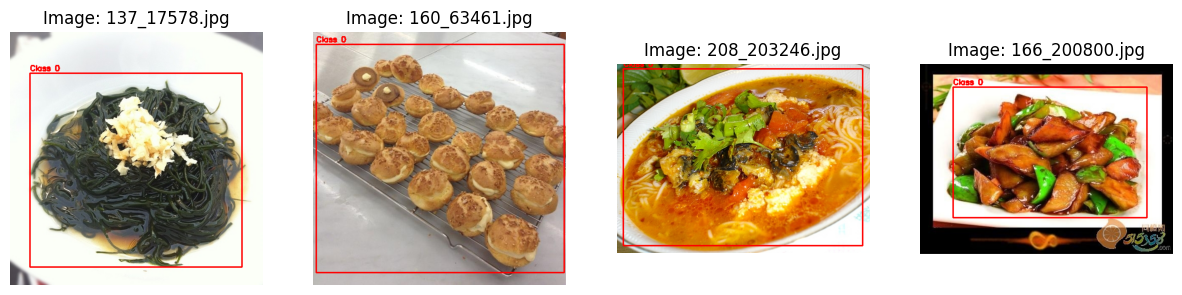

In [12]:
import os
import cv2
import matplotlib.pyplot as plt

# Đường dẫn dataset (cập nhật nếu cần)
dataset_path = "/kaggle/working/dataset"
image_dir = os.path.join(dataset_path, "images", "train")
label_dir = os.path.join(dataset_path, "labels", "train")

# Lấy danh sách file ảnh
image_files = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Chọn 3-4 ảnh để hiển thị
num_samples = min(4, len(image_files))
fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))

for i in range(num_samples):
    img_file = image_files[i]
    img_path = os.path.join(image_dir, img_file)
    
    # Đọc ảnh
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Đọc file nhãn YOLO tương ứng
    label_file = os.path.join(label_dir, img_file.replace('.jpg', '.txt').replace('.png', '.txt'))
    
    # Vẽ bounding boxes nếu có nhãn
    if os.path.exists(label_file):
        with open(label_file, "r") as f:
            lines = f.readlines()
            for line in lines:
                values = line.strip().split()
                class_id = int(values[0])
                x_center, y_center, width, height = map(float, values[1:])
                
                # Chuyển YOLO format sang tọa độ pixel
                img_h, img_w, _ = img.shape
                x1 = int((x_center - width / 2) * img_w)
                y1 = int((y_center - height / 2) * img_h)
                x2 = int((x_center + width / 2) * img_w)
                y2 = int((y_center + height / 2) * img_h)

                # Vẽ bounding box
                cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
                cv2.putText(img, f"Class {class_id}", (x1, y1 - 5), 
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Hiển thị ảnh
    axes[i].imshow(img)
    axes[i].axis("off")
    axes[i].set_title(f"Image: {img_file}")

plt.show()


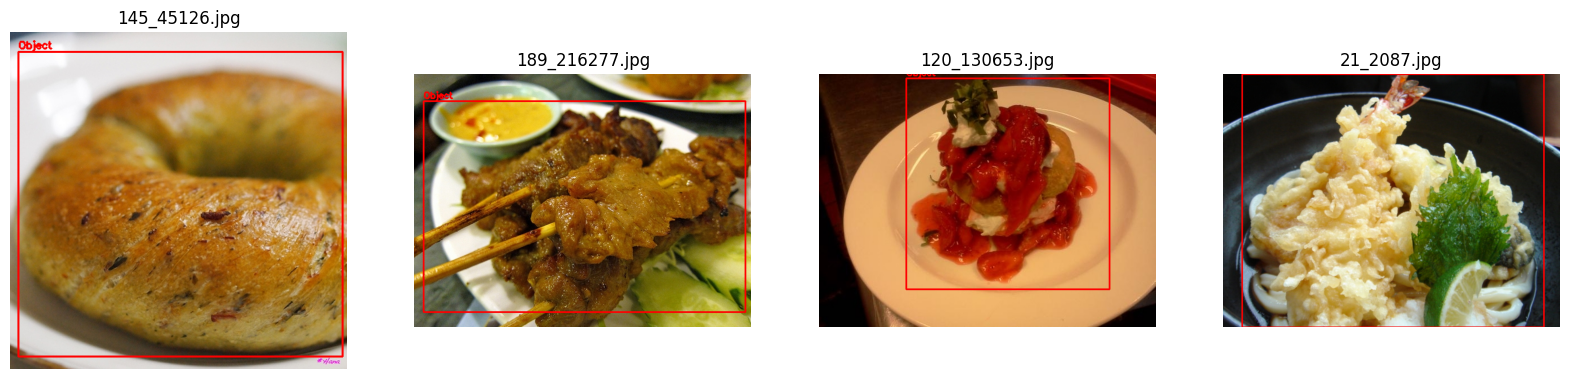

In [13]:
import os
import cv2
import matplotlib.pyplot as plt

# Đường dẫn dataset (CẬP NHẬT nếu cần)
dataset_path = "/kaggle/working/UECFOOD256_renamed"

# Danh sách ảnh cần hiển thị
image_list = ["145_45126", "189_216277", "120_130653", "21_2087"]

# Tạo figure để hiển thị ảnh
fig, axes = plt.subplots(1, len(image_list), figsize=(20, 5))

for i, image_name in enumerate(image_list):
    folder_num = image_name.split("_")[0]  # Lấy số folder từ tên ảnh
    img_path = os.path.join(dataset_path, folder_num, f"{image_name}.jpg")
    bb_info_path = os.path.join(dataset_path, folder_num, "bb_info.txt")

    # Kiểm tra nếu ảnh tồn tại
    if not os.path.exists(img_path):
        print(f"⚠ Ảnh {image_name}.jpg không tồn tại trong folder {folder_num}")
        axes[i].axis("off")
        continue

    # Đọc ảnh
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Đọc bounding box từ bb_info.txt
    if os.path.exists(bb_info_path):
        with open(bb_info_path, "r") as f:
            lines = f.readlines()
            for line in lines[1:]:  # Bỏ qua dòng đầu tiên (header)
                values = line.strip().split()
                img_id = values[0]
                if img_id == image_name:  # Nếu trùng với ảnh cần hiển thị
                    x1, y1, x2, y2 = map(int, values[1:])
                    # Vẽ bounding box lên ảnh
                    cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
                    cv2.putText(img, "Object", (x1, y1 - 5),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Hiển thị ảnh
    axes[i].imshow(img)
    axes[i].axis("off")
    axes[i].set_title(f"{image_name}.jpg")

plt.show()


In [14]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.2/922.2 kB 12.5 MB/s eta 0:00:00


In [15]:
from ultralytics import YOLO

# Load model YOLOv8 nano
model = YOLO("yolov8n.pt")

# Train mô hình
results = model.train(data=yaml_path, epochs=120, batch=16, imgsz=640, device="cuda")

print("✅ Đã hoàn tất quá trình train YOLOv8!")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 53.4MB/s]


Ultralytics 8.3.85 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/working/UECFOOD256_renamed/data.yaml, epochs=120, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_co

100%|██████████| 755k/755k [00:00<00:00, 10.9MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 47.2MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/dataset/labels/train... 25011 images, 0 backgrounds, 61 corrupt: 100%|██████████| 25011/25011 [00:20<00:00, 1194.25it/s]

train: WARNING ⚠️ /kaggle/working/dataset/images/train/10_10870.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.1972]
train: WARNING ⚠️ /kaggle/working/dataset/images/train/10_10948.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.2917]
train: WARNING ⚠️ /kaggle/working/dataset/images/train/10_920.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0417]
train: WARNING ⚠️ /kaggle/working/dataset/images/train/150_37571.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.3262]
train: WARNING ⚠️ /kaggle/working/dataset/images/train/15_1458.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.3333]
train: WARNING ⚠️ /kaggle/working/dataset/images/train/16_1503.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /kaggle/working/dataset/images/train/16_1517.jpg: ignoring corrupt image/label: non-normalized or o

train: New cache created: /kaggle/working/dataset/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.5 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /kaggle/working/dataset/labels/valid... 3029 images, 0 backgrounds, 2 corrupt: 100%|██████████| 3029/3029 [00:02<00:00, 1099.57it/s]

val: WARNING ⚠️ /kaggle/working/dataset/images/valid/16_1585.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /kaggle/working/dataset/images/valid/58_5810.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.3167]
val: WARNING ⚠️ /kaggle/working/dataset/images/valid/58_5854.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /kaggle/working/dataset/images/valid/67_86.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /kaggle/working/dataset/images/valid/95_12699.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /kaggle/working/dataset/images/valid/96_12776.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.3118]
val: New cache created: /kaggle/working/dataset/labels/valid.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 120 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/120      2.04G     0.9106      1.187      1.419         13        640: 100%|██████████| 1560/1560 [04:23<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:17<00:00,  5.34it/s]


                   all       3027       3027      0.903      0.836       0.91      0.633

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/120      2.08G     0.9565     0.7985      1.439         19        640: 100%|██████████| 1560/1560 [04:20<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  5.97it/s]

                   all       3027       3027      0.913      0.833      0.913      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/120      2.07G      1.011     0.7817      1.484         21        640: 100%|██████████| 1560/1560 [04:16<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.24it/s]

                   all       3027       3027      0.912      0.834      0.898      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/120      2.07G      1.024     0.7669      1.497         13        640: 100%|██████████| 1560/1560 [04:16<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.19it/s]

                   all       3027       3027       0.93      0.844      0.912      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/120      2.07G     0.9929     0.7313      1.473         13        640: 100%|██████████| 1560/1560 [04:15<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.12it/s]

                   all       3027       3027       0.92      0.845      0.917      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/120      2.07G     0.9688     0.7113      1.451         18        640: 100%|██████████| 1560/1560 [04:15<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.17it/s]

                   all       3027       3027      0.921       0.85      0.916       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/120      2.07G     0.9521     0.7035      1.439         16        640: 100%|██████████| 1560/1560 [04:15<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.14it/s]

                   all       3027       3027      0.922       0.85      0.921      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/120      2.07G     0.9397     0.6905      1.428         18        640: 100%|██████████| 1560/1560 [04:16<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.16it/s]

                   all       3027       3027      0.921      0.853      0.922      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/120      2.07G     0.9257      0.687      1.419         18        640: 100%|██████████| 1560/1560 [04:17<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.11it/s]

                   all       3027       3027      0.916      0.848      0.922      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/120      2.07G      0.918     0.6762      1.413         13        640: 100%|██████████| 1560/1560 [04:16<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.26it/s]

                   all       3027       3027      0.939       0.85      0.929      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/120      2.07G     0.9153     0.6667      1.409         11        640: 100%|██████████| 1560/1560 [04:17<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  5.97it/s]

                   all       3027       3027      0.925      0.844      0.925      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/120      2.07G     0.9078     0.6712      1.407         17        640: 100%|██████████| 1560/1560 [04:16<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.08it/s]

                   all       3027       3027       0.93      0.844      0.928      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/120      2.07G     0.8957     0.6592      1.396         17        640: 100%|██████████| 1560/1560 [04:17<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.04it/s]

                   all       3027       3027      0.928      0.845      0.929      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/120      2.07G     0.8981     0.6596      1.396         22        640: 100%|██████████| 1560/1560 [04:17<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.17it/s]

                   all       3027       3027      0.921      0.858      0.928      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/120      2.07G     0.8868     0.6579      1.387         22        640: 100%|██████████| 1560/1560 [04:17<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.32it/s]

                   all       3027       3027       0.93      0.848      0.929      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/120      2.07G     0.8809     0.6516      1.383         16        640: 100%|██████████| 1560/1560 [04:16<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.00it/s]

                   all       3027       3027      0.941      0.854      0.934      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/120      2.07G     0.8814     0.6484      1.383         16        640: 100%|██████████| 1560/1560 [04:17<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.14it/s]

                   all       3027       3027      0.939      0.853      0.934      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/120      2.07G      0.873     0.6478      1.379         15        640: 100%|██████████| 1560/1560 [04:18<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.18it/s]

                   all       3027       3027      0.941      0.847      0.933      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/120      2.07G     0.8648     0.6494      1.374         22        640: 100%|██████████| 1560/1560 [04:18<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.04it/s]

                   all       3027       3027      0.935      0.857      0.935      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/120      2.07G     0.8657     0.6388      1.373         13        640: 100%|██████████| 1560/1560 [04:20<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.12it/s]

                   all       3027       3027      0.936      0.859      0.937      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/120      2.07G     0.8635     0.6423      1.369         16        640: 100%|██████████| 1560/1560 [04:17<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:14<00:00,  6.36it/s]

                   all       3027       3027      0.928      0.855      0.934      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/120      2.07G     0.8651      0.633      1.371         19        640: 100%|██████████| 1560/1560 [04:16<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.24it/s]

                   all       3027       3027      0.938      0.856      0.937      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/120      2.07G     0.8583     0.6336      1.365         17        640: 100%|██████████| 1560/1560 [04:16<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.29it/s]

                   all       3027       3027      0.937      0.853      0.938      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/120      2.07G     0.8542     0.6336      1.364         18        640: 100%|██████████| 1560/1560 [04:15<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.25it/s]

                   all       3027       3027      0.945      0.855      0.939      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/120      2.07G     0.8521     0.6297      1.363         18        640: 100%|██████████| 1560/1560 [04:16<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.26it/s]

                   all       3027       3027      0.942      0.858       0.94      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/120      2.07G     0.8517     0.6288      1.362         13        640: 100%|██████████| 1560/1560 [04:19<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.20it/s]

                   all       3027       3027      0.934      0.865       0.94      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/120      2.07G     0.8458     0.6228       1.36         14        640: 100%|██████████| 1560/1560 [04:18<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.29it/s]

                   all       3027       3027       0.94       0.86      0.938      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/120      2.07G     0.8438     0.6282      1.357         19        640: 100%|██████████| 1560/1560 [04:17<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.28it/s]

                   all       3027       3027      0.935      0.858      0.941      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/120      2.07G      0.842     0.6213      1.355         20        640: 100%|██████████| 1560/1560 [04:19<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.19it/s]

                   all       3027       3027      0.936      0.863      0.941      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/120      2.07G     0.8407     0.6248      1.353         18        640: 100%|██████████| 1560/1560 [04:17<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:14<00:00,  6.35it/s]

                   all       3027       3027      0.938       0.86      0.941      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/120      2.07G     0.8404      0.617      1.353         14        640: 100%|██████████| 1560/1560 [04:18<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.15it/s]

                   all       3027       3027       0.94      0.857       0.94      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/120      2.07G      0.835     0.6166      1.348         12        640: 100%|██████████| 1560/1560 [04:16<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.00it/s]

                   all       3027       3027      0.941      0.857      0.941      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/120      2.07G     0.8335     0.6286      1.348         14        640: 100%|██████████| 1560/1560 [04:17<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:16<00:00,  5.74it/s]

                   all       3027       3027      0.942      0.856      0.941      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/120      2.07G     0.8329     0.6206      1.348         14        640: 100%|██████████| 1560/1560 [04:18<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.27it/s]

                   all       3027       3027       0.94      0.858      0.942      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/120      2.07G     0.8336     0.6216      1.348         18        640: 100%|██████████| 1560/1560 [04:18<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.23it/s]

                   all       3027       3027       0.94      0.857       0.94      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/120      2.07G     0.8283     0.6166      1.346         14        640: 100%|██████████| 1560/1560 [04:19<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.31it/s]

                   all       3027       3027      0.939      0.856      0.939      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/120      2.07G     0.8278     0.6183      1.348         13        640: 100%|██████████| 1560/1560 [04:16<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:16<00:00,  5.85it/s]

                   all       3027       3027      0.937      0.857       0.94      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/120      2.07G     0.8306     0.6177      1.347         17        640: 100%|██████████| 1560/1560 [04:18<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.13it/s]

                   all       3027       3027       0.94      0.856       0.94      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/120      2.07G     0.8251     0.6108      1.343         17        640: 100%|██████████| 1560/1560 [04:17<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.33it/s]

                   all       3027       3027       0.94      0.856      0.941      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/120      2.07G     0.8222     0.6091      1.339         13        640: 100%|██████████| 1560/1560 [04:18<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.30it/s]

                   all       3027       3027      0.939      0.857      0.941      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/120      2.07G     0.8221     0.6097       1.34         17        640: 100%|██████████| 1560/1560 [04:15<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.24it/s]

                   all       3027       3027      0.941      0.857      0.942      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/120      2.07G      0.818     0.6073      1.338         17        640: 100%|██████████| 1560/1560 [04:14<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.25it/s]

                   all       3027       3027      0.944      0.856      0.943      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/120      2.07G     0.8172     0.6087      1.336         15        640: 100%|██████████| 1560/1560 [04:15<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:14<00:00,  6.43it/s]

                   all       3027       3027      0.943      0.858      0.942      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/120      2.07G     0.8162     0.6079      1.336         16        640: 100%|██████████| 1560/1560 [04:15<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.20it/s]

                   all       3027       3027      0.939      0.859      0.943      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/120      2.07G     0.8133     0.6025      1.335         18        640: 100%|██████████| 1560/1560 [04:16<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.30it/s]

                   all       3027       3027       0.94      0.858      0.942      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/120      2.07G     0.8124     0.6026      1.333         19        640: 100%|██████████| 1560/1560 [04:15<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.25it/s]

                   all       3027       3027       0.94      0.856      0.942      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/120      2.07G     0.8123     0.6009       1.33         23        640: 100%|██████████| 1560/1560 [04:18<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.31it/s]

                   all       3027       3027      0.939      0.856      0.942      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/120      2.07G     0.8158      0.605      1.333         20        640: 100%|██████████| 1560/1560 [04:15<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:14<00:00,  6.34it/s]

                   all       3027       3027      0.942      0.856      0.941      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/120      2.07G     0.8137     0.6047      1.334         20        640: 100%|██████████| 1560/1560 [04:15<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.17it/s]

                   all       3027       3027      0.942      0.856      0.942      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/120      2.07G     0.8127     0.5949      1.332         15        640: 100%|██████████| 1560/1560 [04:16<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:14<00:00,  6.39it/s]

                   all       3027       3027      0.942      0.856      0.942      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/120      2.07G     0.8121     0.6007      1.329         13        640: 100%|██████████| 1560/1560 [04:15<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.31it/s]

                   all       3027       3027      0.943      0.856      0.942      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/120      2.07G     0.8033     0.5973      1.325         11        640: 100%|██████████| 1560/1560 [04:15<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:14<00:00,  6.36it/s]

                   all       3027       3027      0.943      0.859      0.943      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/120      2.07G     0.8026     0.5959      1.326         17        640: 100%|██████████| 1560/1560 [04:15<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:14<00:00,  6.41it/s]

                   all       3027       3027      0.941      0.858      0.943      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/120      2.07G     0.8016     0.5965      1.324         18        640: 100%|██████████| 1560/1560 [04:16<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.26it/s]

                   all       3027       3027      0.942      0.856      0.943      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/120      2.07G     0.8036       0.59      1.325         16        640: 100%|██████████| 1560/1560 [04:16<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.25it/s]

                   all       3027       3027      0.942      0.858      0.943      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/120      2.07G     0.8004     0.5928      1.321         19        640: 100%|██████████| 1560/1560 [04:17<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.20it/s]

                   all       3027       3027      0.944      0.856      0.943      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/120      2.07G     0.7969     0.5896      1.323         18        640: 100%|██████████| 1560/1560 [04:18<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.31it/s]

                   all       3027       3027      0.944      0.856      0.943      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/120      2.07G     0.7975     0.5883      1.322         11        640: 100%|██████████| 1560/1560 [04:16<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.25it/s]

                   all       3027       3027      0.943      0.858      0.943      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/120      2.07G        0.8     0.5896      1.321         18        640: 100%|██████████| 1560/1560 [04:16<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.33it/s]

                   all       3027       3027      0.943      0.858      0.943      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/120      2.07G     0.7958     0.5933      1.319         15        640: 100%|██████████| 1560/1560 [04:20<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.25it/s]

                   all       3027       3027      0.943      0.858      0.943      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/120      2.07G     0.7927     0.5841      1.317         13        640: 100%|██████████| 1560/1560 [04:16<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:16<00:00,  5.89it/s]

                   all       3027       3027      0.942      0.857      0.943      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/120      2.07G     0.7918     0.5813      1.317         17        640: 100%|██████████| 1560/1560 [04:15<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:16<00:00,  5.64it/s]

                   all       3027       3027      0.942      0.857      0.943      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/120      2.07G     0.7943     0.5841      1.317         15        640: 100%|██████████| 1560/1560 [04:17<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:17<00:00,  5.56it/s]

                   all       3027       3027      0.941      0.858      0.943      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/120      2.07G     0.7937     0.5805      1.318         16        640: 100%|██████████| 1560/1560 [04:17<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:16<00:00,  5.89it/s]


                   all       3027       3027      0.941      0.859      0.943      0.725

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/120      2.07G     0.7896      0.583      1.314         13        640: 100%|██████████| 1560/1560 [04:16<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.20it/s]

                   all       3027       3027      0.939      0.859      0.943      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/120      2.07G     0.7877     0.5813      1.311         13        640: 100%|██████████| 1560/1560 [04:18<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:14<00:00,  6.35it/s]

                   all       3027       3027       0.94      0.859      0.943      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/120      2.07G     0.7842      0.582      1.311         17        640: 100%|██████████| 1560/1560 [04:17<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.24it/s]

                   all       3027       3027      0.938       0.86      0.943      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/120      2.07G       0.79     0.5801      1.315         16        640: 100%|██████████| 1560/1560 [04:17<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.30it/s]

                   all       3027       3027       0.94       0.86      0.944      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/120      2.07G      0.784      0.575      1.311         12        640: 100%|██████████| 1560/1560 [04:17<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.27it/s]

                   all       3027       3027      0.942       0.86      0.944      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/120      2.07G     0.7796     0.5727      1.309         16        640: 100%|██████████| 1560/1560 [04:17<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.20it/s]

                   all       3027       3027      0.941      0.861      0.944      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/120      2.07G     0.7846     0.5721       1.31         22        640: 100%|██████████| 1560/1560 [04:20<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.25it/s]

                   all       3027       3027       0.94      0.862      0.944      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/120      2.07G     0.7778     0.5743      1.306         17        640: 100%|██████████| 1560/1560 [04:17<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.32it/s]

                   all       3027       3027       0.94      0.862      0.944      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/120      2.07G     0.7795      0.575      1.307         15        640: 100%|██████████| 1560/1560 [04:17<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:17<00:00,  5.47it/s]

                   all       3027       3027      0.941      0.861      0.944      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/120      2.07G     0.7766      0.568      1.304         18        640: 100%|██████████| 1560/1560 [04:20<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:16<00:00,  5.62it/s]

                   all       3027       3027       0.94       0.86      0.944      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/120      2.07G       0.78     0.5694      1.307         18        640: 100%|██████████| 1560/1560 [04:20<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.16it/s]

                   all       3027       3027      0.941      0.861      0.944      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/120      2.07G     0.7737     0.5705      1.303         18        640: 100%|██████████| 1560/1560 [04:22<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.21it/s]

                   all       3027       3027       0.94      0.862      0.944      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/120      2.07G     0.7734     0.5722      1.301         18        640: 100%|██████████| 1560/1560 [04:23<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.19it/s]

                   all       3027       3027      0.941      0.862      0.944      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/120      2.07G     0.7743     0.5639      1.303         20        640: 100%|██████████| 1560/1560 [04:23<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.08it/s]

                   all       3027       3027      0.941      0.863      0.944      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/120      2.07G     0.7706     0.5607        1.3         13        640: 100%|██████████| 1560/1560 [04:24<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.17it/s]

                   all       3027       3027      0.943      0.863      0.944      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/120      2.07G     0.7697     0.5591      1.301         16        640: 100%|██████████| 1560/1560 [04:19<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.19it/s]

                   all       3027       3027      0.942      0.863      0.944      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/120      2.07G     0.7662     0.5607      1.299         17        640: 100%|██████████| 1560/1560 [04:18<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.30it/s]

                   all       3027       3027      0.943      0.862      0.945       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/120      2.07G     0.7632     0.5581      1.296         20        640: 100%|██████████| 1560/1560 [04:19<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.30it/s]

                   all       3027       3027      0.943      0.861      0.945       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/120      2.07G     0.7636     0.5602      1.296         19        640: 100%|██████████| 1560/1560 [04:18<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.30it/s]

                   all       3027       3027      0.941      0.863      0.945       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/120      2.07G     0.7606     0.5593      1.294         20        640: 100%|██████████| 1560/1560 [04:19<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.24it/s]

                   all       3027       3027      0.942      0.863      0.945      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/120      2.07G     0.7595      0.558      1.294         12        640: 100%|██████████| 1560/1560 [04:18<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:14<00:00,  6.34it/s]

                   all       3027       3027      0.942      0.863      0.945       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/120      2.07G     0.7541     0.5561      1.288         11        640: 100%|██████████| 1560/1560 [04:18<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.28it/s]

                   all       3027       3027      0.943      0.862      0.945       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/120      2.07G     0.7546      0.555       1.29         18        640: 100%|██████████| 1560/1560 [04:18<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.25it/s]

                   all       3027       3027      0.944      0.861      0.946       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/120      2.07G     0.7589     0.5503       1.29         16        640: 100%|██████████| 1560/1560 [04:18<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.18it/s]

                   all       3027       3027      0.943      0.861      0.946       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/120      2.07G     0.7543     0.5495      1.287         18        640: 100%|██████████| 1560/1560 [04:20<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.13it/s]

                   all       3027       3027      0.943      0.862      0.946       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/120      2.07G      0.752     0.5549      1.287         19        640: 100%|██████████| 1560/1560 [04:20<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.20it/s]

                   all       3027       3027      0.943      0.862      0.946      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/120      2.07G     0.7516     0.5456      1.286         13        640: 100%|██████████| 1560/1560 [04:20<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.15it/s]

                   all       3027       3027      0.942      0.862      0.946       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/120      2.07G     0.7486     0.5397      1.287         18        640: 100%|██████████| 1560/1560 [04:19<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.31it/s]

                   all       3027       3027      0.942      0.862      0.946       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/120      2.07G     0.7464     0.5422      1.284         13        640: 100%|██████████| 1560/1560 [04:19<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.13it/s]

                   all       3027       3027      0.943      0.861      0.946       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/120      2.07G     0.7424     0.5417       1.28         15        640: 100%|██████████| 1560/1560 [04:20<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.20it/s]

                   all       3027       3027      0.943      0.861      0.946      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/120      2.07G     0.7431      0.546       1.28         14        640: 100%|██████████| 1560/1560 [04:20<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.14it/s]

                   all       3027       3027      0.943      0.861      0.946      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/120      2.07G     0.7436     0.5338       1.28         21        640: 100%|██████████| 1560/1560 [04:20<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.25it/s]

                   all       3027       3027      0.944      0.862      0.947      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/120      2.07G     0.7447     0.5401      1.282         18        640: 100%|██████████| 1560/1560 [04:21<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.10it/s]

                   all       3027       3027      0.944      0.862      0.947      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/120      2.07G     0.7355     0.5397      1.275         18        640: 100%|██████████| 1560/1560 [04:21<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.13it/s]

                   all       3027       3027      0.943      0.862      0.947      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/120      2.07G     0.7426     0.5369      1.277         20        640: 100%|██████████| 1560/1560 [04:21<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.20it/s]

                   all       3027       3027      0.944      0.862      0.947      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/120      2.07G     0.7364     0.5349      1.276         16        640: 100%|██████████| 1560/1560 [04:20<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.14it/s]

                   all       3027       3027      0.944      0.863      0.947      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/120      2.07G      0.735     0.5337      1.276         19        640: 100%|██████████| 1560/1560 [04:19<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.33it/s]

                   all       3027       3027      0.945      0.862      0.947      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/120      2.07G     0.7328     0.5293      1.272         16        640: 100%|██████████| 1560/1560 [04:19<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.16it/s]

                   all       3027       3027      0.944      0.863      0.947      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/120      2.07G      0.732     0.5311      1.273         16        640: 100%|██████████| 1560/1560 [04:20<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.25it/s]

                   all       3027       3027      0.945      0.863      0.947      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/120      2.07G     0.7272     0.5299      1.271         16        640: 100%|██████████| 1560/1560 [04:20<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.16it/s]

                   all       3027       3027      0.945      0.863      0.946      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/120      2.07G     0.7246     0.5265      1.268         14        640: 100%|██████████| 1560/1560 [04:19<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.21it/s]

                   all       3027       3027      0.943      0.864      0.947      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/120      2.07G     0.7246     0.5254      1.267         18        640: 100%|██████████| 1560/1560 [04:18<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.22it/s]

                   all       3027       3027      0.942      0.864      0.947      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/120      2.07G     0.7203      0.522      1.264         17        640: 100%|██████████| 1560/1560 [04:18<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.28it/s]

                   all       3027       3027      0.942      0.864      0.948      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/120      2.07G     0.7193     0.5202      1.264         11        640: 100%|██████████| 1560/1560 [04:19<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.16it/s]

                   all       3027       3027      0.944      0.863      0.947      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/120      2.07G     0.7139     0.5202       1.26         19        640: 100%|██████████| 1560/1560 [04:20<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.27it/s]

                   all       3027       3027      0.944      0.862      0.947      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/120      2.07G     0.7169      0.517      1.262         19        640: 100%|██████████| 1560/1560 [04:21<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.10it/s]

                   all       3027       3027      0.945       0.86      0.946      0.734


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/120      2.07G     0.6558     0.4329      1.355          6        640: 100%|██████████| 1560/1560 [04:16<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.22it/s]

                   all       3027       3027      0.945      0.861      0.947      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/120      2.07G     0.6528     0.4225      1.343          6        640: 100%|██████████| 1560/1560 [04:15<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.15it/s]

                   all       3027       3027      0.945      0.861      0.947      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/120      2.07G     0.6465     0.4178       1.34          6        640: 100%|██████████| 1560/1560 [04:17<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.25it/s]

                   all       3027       3027      0.944      0.863      0.947      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/120      2.07G     0.6389     0.4168      1.335          6        640: 100%|██████████| 1560/1560 [04:15<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.19it/s]

                   all       3027       3027      0.944      0.863      0.948      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/120      2.07G     0.6361     0.4134      1.327          6        640: 100%|██████████| 1560/1560 [04:15<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.19it/s]

                   all       3027       3027      0.946      0.862      0.948      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/120      2.07G     0.6288     0.4094      1.324          6        640: 100%|██████████| 1560/1560 [04:15<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.21it/s]

                   all       3027       3027      0.945      0.861      0.948      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/120      2.07G     0.6303     0.4068      1.322          6        640: 100%|██████████| 1560/1560 [04:15<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.11it/s]

                   all       3027       3027      0.945      0.862      0.948      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/120      2.07G     0.6269     0.4027      1.321          6        640: 100%|██████████| 1560/1560 [04:15<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.31it/s]

                   all       3027       3027      0.945      0.862      0.948      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/120      2.07G     0.6245     0.4032      1.318          6        640: 100%|██████████| 1560/1560 [04:14<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.18it/s]

                   all       3027       3027      0.944       0.86      0.948      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/120      2.07G     0.6203     0.3995      1.318          6        640: 100%|██████████| 1560/1560 [04:15<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15<00:00,  6.16it/s]

                   all       3027       3027      0.943      0.861      0.948      0.736



120 epochs completed in 9.142 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.85 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:16<00:00,  5.87it/s]


                   all       3027       3027      0.944       0.86      0.948      0.736


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.1ms preprocess, 1.6ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train
✅ Đã hoàn tất quá trình train YOLOv8!
